# Import Libraries & Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import math

from scipy import stats

%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
# Import Dataset
url='https://drive.google.com/file/d/1czUTTSBEDQ-WB8u2hV9B1ig3AkPp7zSz/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_flight = pd.read_csv(url,on_bad_lines='skip')
df_flight.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
58682,54335,9/14/2011,2/7/2013,Male,4,dalian,liaoning,CN,27.0,3/31/2014,...,0.0,3272,10/27/2013,157,131.000000,260,0,0.449841,2255,21
20920,12296,11/18/2009,7/13/2010,Male,4,zhuzhou,hunan,CN,46.0,3/31/2014,...,7129.0,20931,3/2/2014,30,58.777778,358,0,0.558974,8487,0
53097,26467,10/17/2010,10/17/2010,Male,4,tianexian,guangxi,CN,43.0,3/31/2014,...,2196.0,2497,3/27/2014,5,1.000000,1,0,0.919075,2380,0
35681,4783,5/7/2010,5/12/2010,Male,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,5958.0,8309,1/12/2014,80,122.250000,294,0,0.688018,4314,0
26521,62157,8/31/2009,8/1/2010,Male,4,daqing,heilongjiang,CN,37.0,3/31/2014,...,0.0,11320,10/3/2012,546,26.000000,107,0,0.782535,14368,11


# Exploratory Data Analysis

In [3]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df_flight.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**A. Kesesuaian datatype**

In [5]:
#Cari tanggal 29 Februari 2014
df_flight[df_flight['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [6]:
#Mengambil data yang memiliki tanggal yang benar
df_flight = df_flight[df_flight['LAST_FLIGHT_DATE'] != '2014-02-29 00:00:00']

FFP_Date, First_Flight_Date, Load_Time, dan Last_Flight_Date tersimpan sebagai object; 4 kolom ini lebih cocok tersimpan sebagai datetime

In [7]:
# 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'

df_flight[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']] = df_flight[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].apply(pd.to_datetime, errors='coerce')

print(df_flight.dtypes)

MEMBER_NO                     int64
FFP_DATE             datetime64[ns]
FIRST_FLIGHT_DATE    datetime64[ns]
GENDER                       object
FFP_TIER                      int64
WORK_CITY                    object
WORK_PROVINCE                object
WORK_COUNTRY                 object
AGE                         float64
LOAD_TIME            datetime64[ns]
FLIGHT_COUNT                  int64
BP_SUM                        int64
SUM_YR_1                    float64
SUM_YR_2                    float64
SEG_KM_SUM                    int64
LAST_FLIGHT_DATE     datetime64[ns]
LAST_TO_END                   int64
AVG_INTERVAL                float64
MAX_INTERVAL                  int64
EXCHANGE_COUNT                int64
avg_discount                float64
Points_Sum                    int64
Point_NotFlight               int64
dtype: object


In [8]:
df_flight[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']]

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
0,2006-11-02,2008-12-24,2014-03-31,2014-03-31
1,2007-02-19,2007-08-03,2014-03-31,2014-03-25
2,2007-02-01,2007-08-30,2014-03-31,2014-03-21
3,2008-08-22,2008-08-23,2014-03-31,2013-12-26
4,2009-04-10,2009-04-15,2014-03-31,2014-03-27
...,...,...,...,...
62983,2011-05-20,2013-06-05,2014-03-31,2013-06-09
62984,2010-03-08,2013-09-14,2014-03-31,2014-01-03
62985,2006-03-30,2006-12-02,2014-03-31,2014-03-03
62986,2013-02-06,2013-02-14,2014-03-31,2013-02-26


**B. Jumlah dan posisi nilai kosong**

In [9]:
#menghitung jumlah missing values
count = df_flight.isna().sum().sort_values(ascending = False)
percent = round(df_flight.isna().mean()*100,3).sort_values(ascending = False)

missing_values = pd.concat([count, percent], axis = 1, keys=["Jumlah","Persentase (%)"])
missing_values

,Jumlah,Persentase (%)
WORK_PROVINCE,3248,5.157
WORK_CITY,2269,3.602
SUM_YR_1,551,0.875
LAST_FLIGHT_DATE,421,0.668
AGE,420,0.667
SUM_YR_2,138,0.219
WORK_COUNTRY,26,0.041
GENDER,3,0.005
MEMBER_NO,0,0.000
Points_Sum,0,0.000


Nilai kosong ditemukan di kolom Work_City, Work_Province, Work_Country, Age, Sum_Yr_1, dan Sum_Yr_2, dengan jumlah terbanyak di kolom Work_Province

**C. Pola dalam ringkasan data ((min/mean/median/max/unique/top/freq)**

In [10]:
#Check for categorical data
categories = df_flight.select_dtypes(exclude=[np.number])
categories

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
0,2006-11-02,2008-12-24,Male,.,beijing,CN,2014-03-31,2014-03-31
1,2007-02-19,2007-08-03,Male,NaN,beijing,CN,2014-03-31,2014-03-25
2,2007-02-01,2007-08-30,Male,.,beijing,CN,2014-03-31,2014-03-21
3,2008-08-22,2008-08-23,Male,Los Angeles,CA,US,2014-03-31,2013-12-26
4,2009-04-10,2009-04-15,Male,guiyang,guizhou,CN,2014-03-31,2014-03-27
...,...,...,...,...,...,...,...,...
62983,2011-05-20,2013-06-05,Female,guangzhou,guangdong,CN,2014-03-31,2013-06-09
62984,2010-03-08,2013-09-14,Male,foshan,guangdong,CN,2014-03-31,2014-01-03
62985,2006-03-30,2006-12-02,Female,guangzhou,guangdong,CN,2014-03-31,2014-03-03
62986,2013-02-06,2013-02-14,Female,guangzhou,guangdong,CN,2014-03-31,2013-02-26


In [11]:
#Check for numerical data
numbers = df_flight.select_dtypes(include=[np.number]).reset_index()
numbers

,index,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,0,54993,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,1,28065,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,2,55106,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,3,21189,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,4,39546,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,62983,18375,4,25.0,2,0,0.0,0.0,1134,297,4.000000,4,1,0.000000,12318,22
62984,62984,36041,4,38.0,4,0,0.0,0.0,8016,89,37.000000,60,14,0.000000,106972,43
62985,62985,45690,4,43.0,2,0,0.0,0.0,2594,29,166.000000,166,0,0.000000,0,0
62986,62986,61027,4,36.0,2,0,0.0,0.0,3934,400,12.000000,12,0,0.000000,0,0


In [12]:
#define categorical & numerical columns
cat = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
num = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']

In [13]:
df_flight[cat].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62567
unique,3068,3406,2,3234,1165,118,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,Male,guangzhou,guangdong,CN,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,184,96,48134,9386,17509,57748,62988,959
first,2004-11-01 00:00:00,1905-12-31 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2014-03-31 00:00:00


* Sebagian besar pengguna maskapai adalah laki-laki
* Kebanyakan penumpang bekerja di Cina, khususnya di Guangzhou, Guangdong
* Penumpang dalam dataset ini bekerja di 3234 kota dan 118 negara berbeda
* 96 orang menggunakan maskapai ini pertama kali pada tahun 2013

In [14]:
df_flight[num].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


* Penumpang termuda dalam data maskapai berumur 6 tahun
* Penumpang tertua dalam data maskapai berumur 110 tahun
* Sebagian besar pengguna maskapai berusia 35-48 tahun

In [15]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

##2. Univariate Analysis

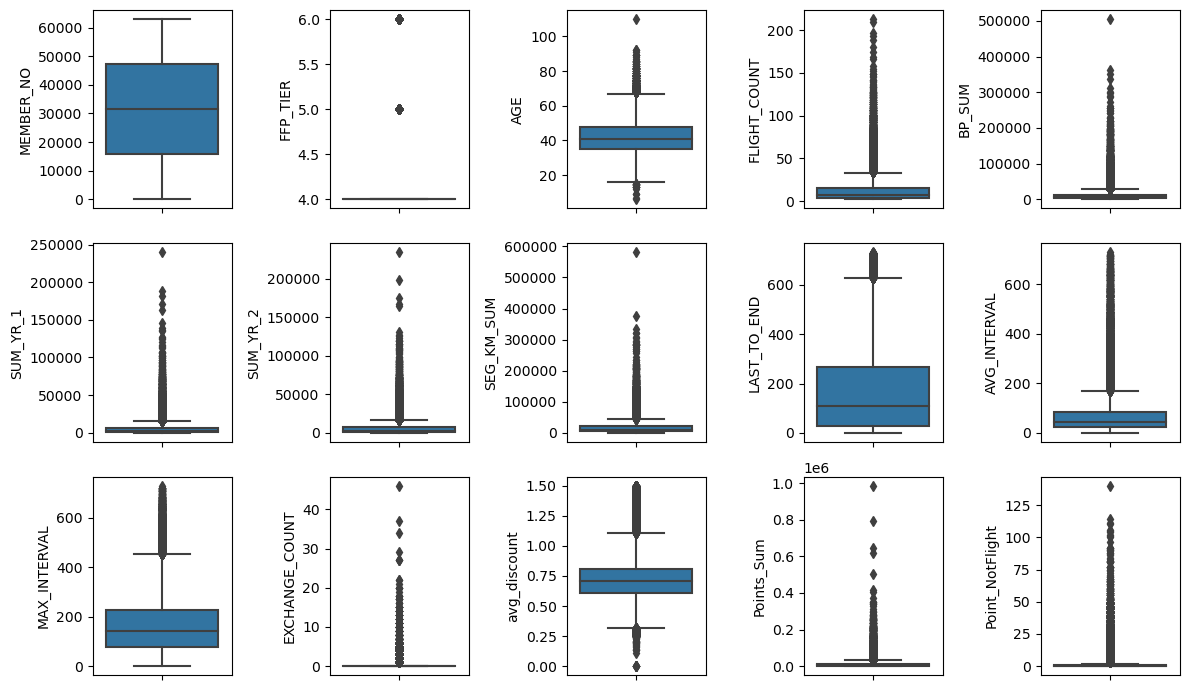

In [16]:
plt.figure(figsize=(12,7))

for i in range(len(num)):
    plt.subplot(3, len(num)//3, i+1)
    sns.boxplot(y= df_flight[num[i]])
plt.tight_layout()
plt.show()

* Mencerminkan temuan dari descriptive summary, terdapat variasi sangat besar dari umur penumpang, dari < 20 tahun hingga satu penumpang berusia 100 tahunan (ada kemungkinan individu ini adalah outlier)
* Sebagian besar penumpang berpengalaman terbang kurang dari 40 kali. Banyak data tunggal dari penumpang dengan 'jam terbang' 50-200 kali
* Kebanyakan penumpang tidak mengumpulkan poin (flight miles) dari maskapai

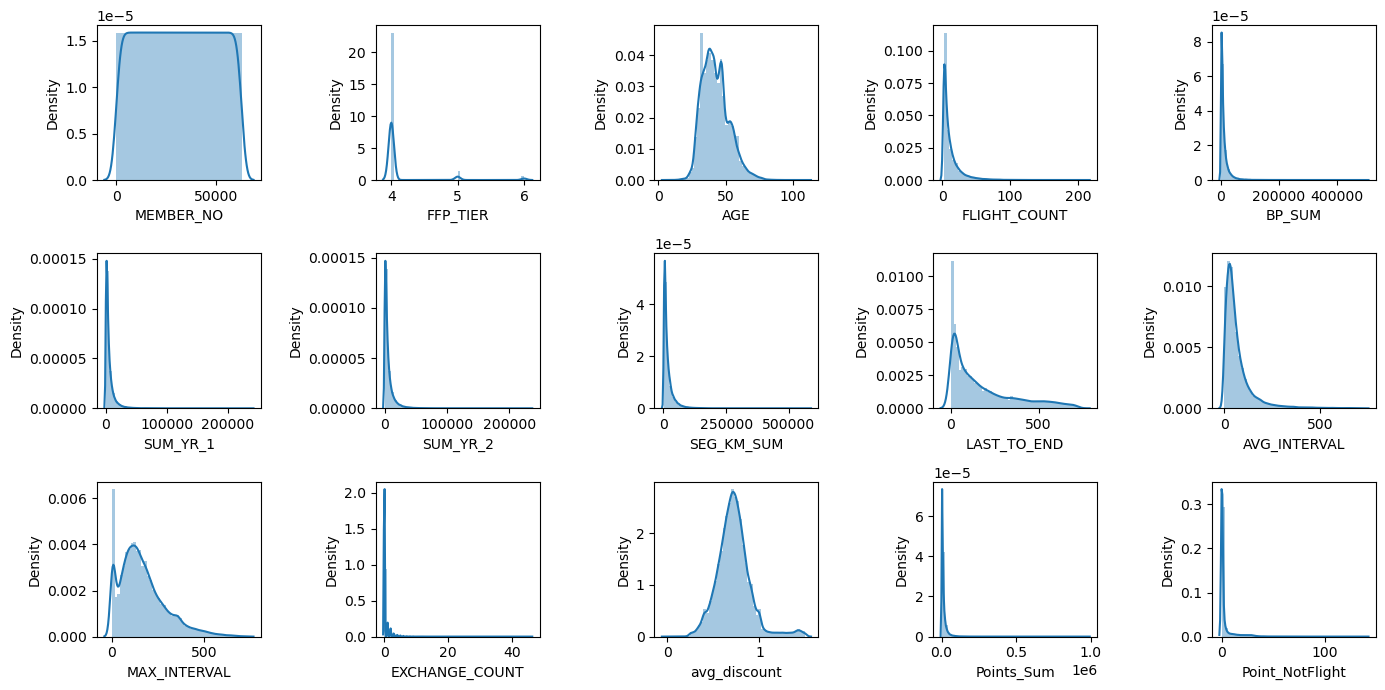

In [17]:
plt.figure(figsize=(14,7))

for i in range(len(num)):
    plt.subplot(3, len(num)//3, i+1)
    sns.distplot(x= df_flight[num[i]])
    plt.xlabel(num[i])
plt.tight_layout()
plt.show()

1. Terlihat bahwa fitur `FFP_TIER` merupakan data kategorikal karena memiliki Discrete Value dari 4 - 6
2. Terlihat bahwa fitur mayoritas berdistribusi positif skew dan memiliki nilai extreme (outliers)
3. Fitur `MEMBER_NO` merupakan unique values jadi bisa diabaikan tidak perlu dilihat distribusinya
4. Fitur`avg_discount` distribusinya cenderung normal

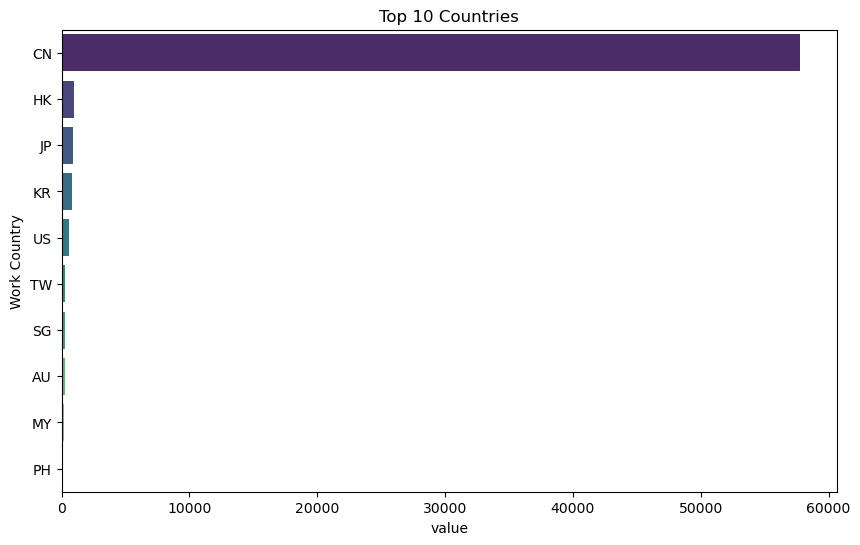

In [18]:
top10_country = df_flight['WORK_COUNTRY'].value_counts().reset_index(name='value')[:10]

country = top10_country['index']
value = top10_country['value']

plt.figure(figsize=(10, 6))
sns.barplot(x=value, y=country, palette='viridis')
plt.ylabel('Work Country')
plt.title('Top 10 Countries')
plt.show()

Penumpang dalam data maskapai paling banyak bekerja di Cina, dengan jumlah mendekati 60 ribu individu

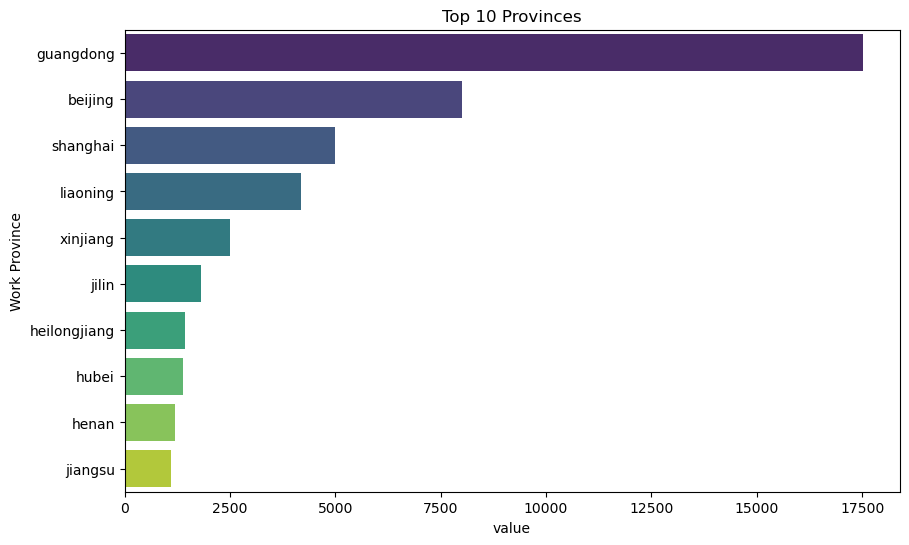

In [19]:
top10_province = df_flight['WORK_PROVINCE'].value_counts().reset_index(name='value')[:10]

province = top10_province['index']
value = top10_province['value']

plt.figure(figsize=(10, 6))
sns.barplot(x=value, y=province, palette='viridis')
plt.ylabel('Work Province')
plt.title('Top 10 Provinces')
plt.show()


Di antara penumpang yang terdata di Cina, mayoritas bertempat di provinsi Guangdong

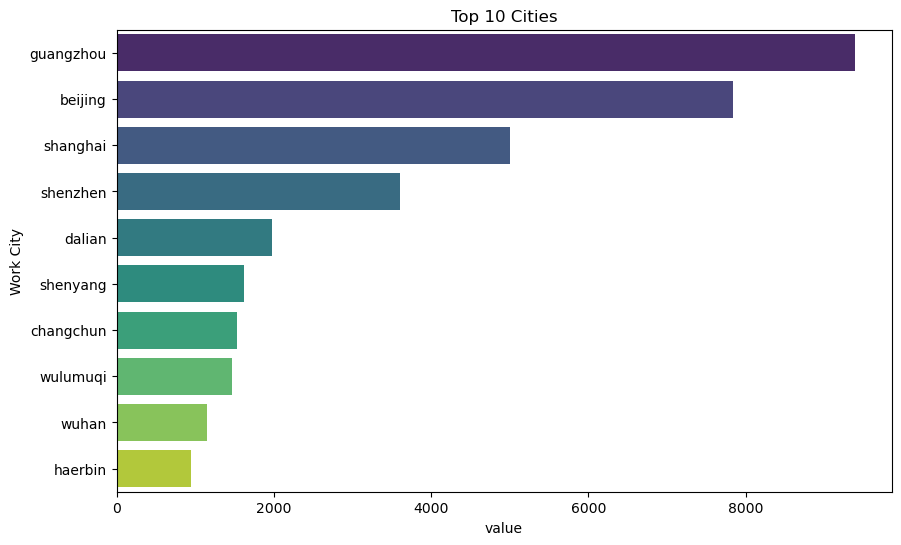

In [20]:
top10_city = df_flight['WORK_CITY'].value_counts().reset_index(name='value')[:10]

city = top10_city['index']
value = top10_city['value']

plt.figure(figsize=(10, 6))
sns.barplot(x=value, y=city, palette='viridis')
plt.ylabel('Work City')
plt.title('Top 10 Cities')
plt.show()


Kota Guangzhou paling banyak menyumbang penumpang, diikuti oleh Beijing dan Shanghai

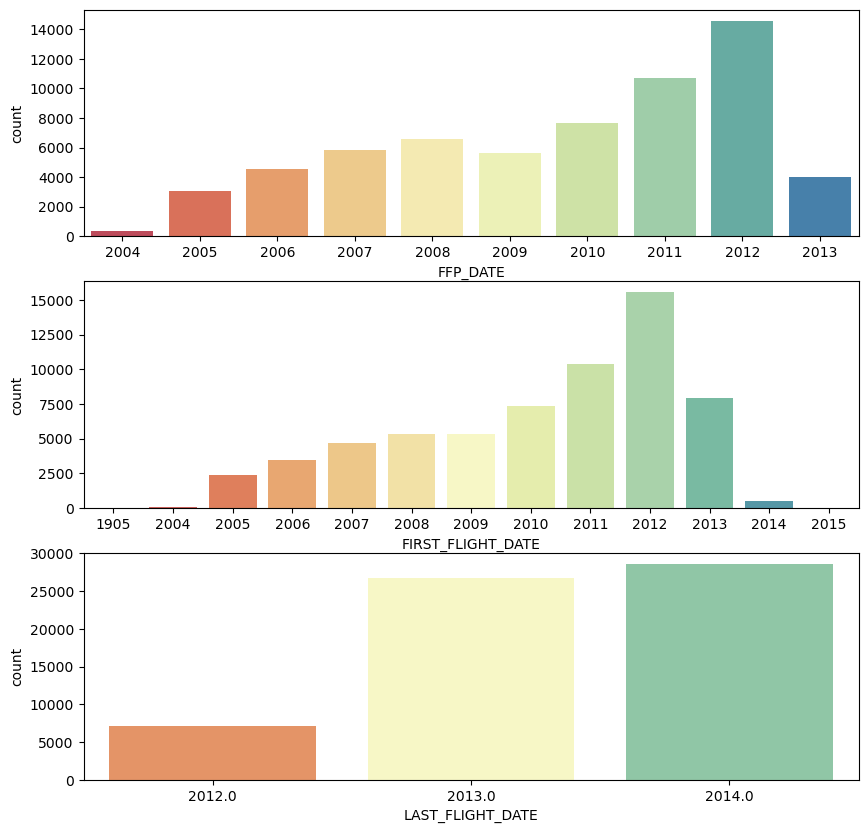

In [21]:
airline_ffp_date = pd.to_datetime(df_flight["FFP_DATE"]).dt.year
airline_firstflight_date = pd.to_datetime(df_flight["FIRST_FLIGHT_DATE"]).dt.year
airline_lastflight_date = pd.to_datetime(df_flight["LAST_FLIGHT_DATE"]).dt.year

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.countplot(x=airline_ffp_date, ax=ax[0], palette="Spectral")
sns.countplot(x=airline_firstflight_date, ax=ax[1], palette="Spectral")
sns.countplot(x=airline_lastflight_date, ax=ax[2], palette="Spectral")

plt.show()


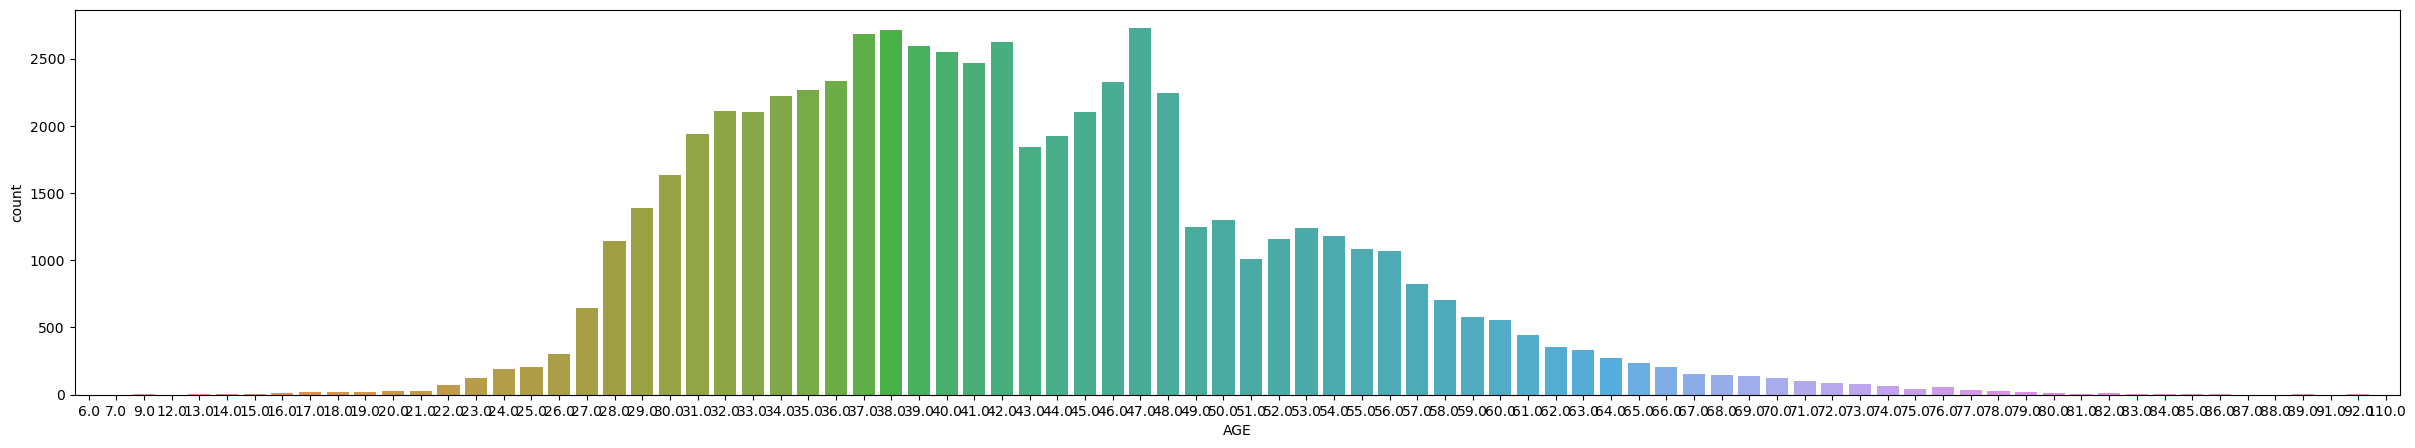

In [22]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="AGE", data=df_flight)

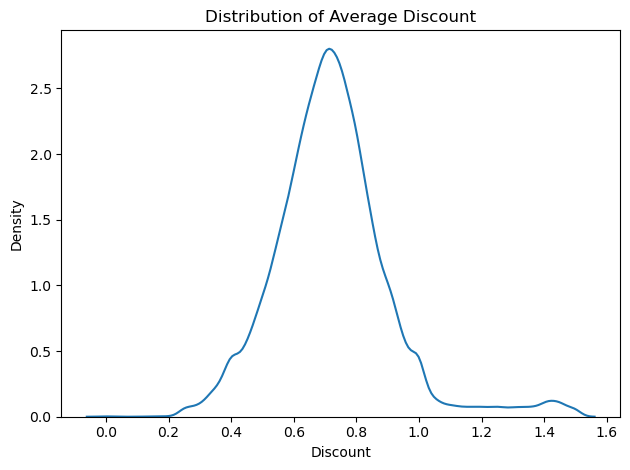

In [23]:
ax = sns.kdeplot(x = 'avg_discount', data=df_flight)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

banyak average discount yang > 1 (100%) dianggap tidak valid, akan di drop

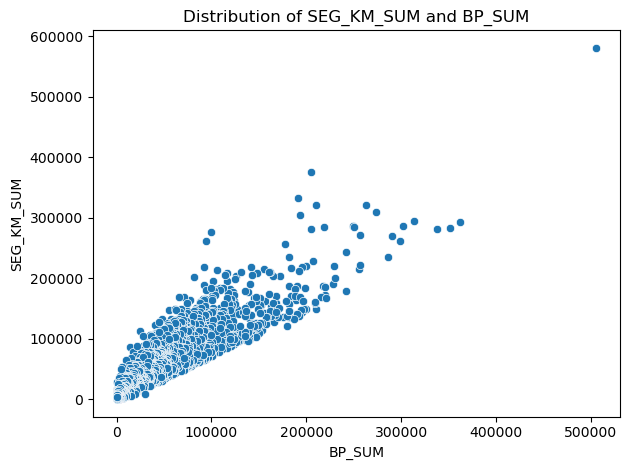

In [24]:
ax = sns.scatterplot(x = 'BP_SUM', y = 'SEG_KM_SUM',  data=df_flight)
ax.set_title("Distribution of SEG_KM_SUM and BP_SUM")
ax.set_ylabel("SEG_KM_SUM")
ax.set_xlabel("BP_SUM")
plt.tight_layout()

## 3. Multivariate Analysis

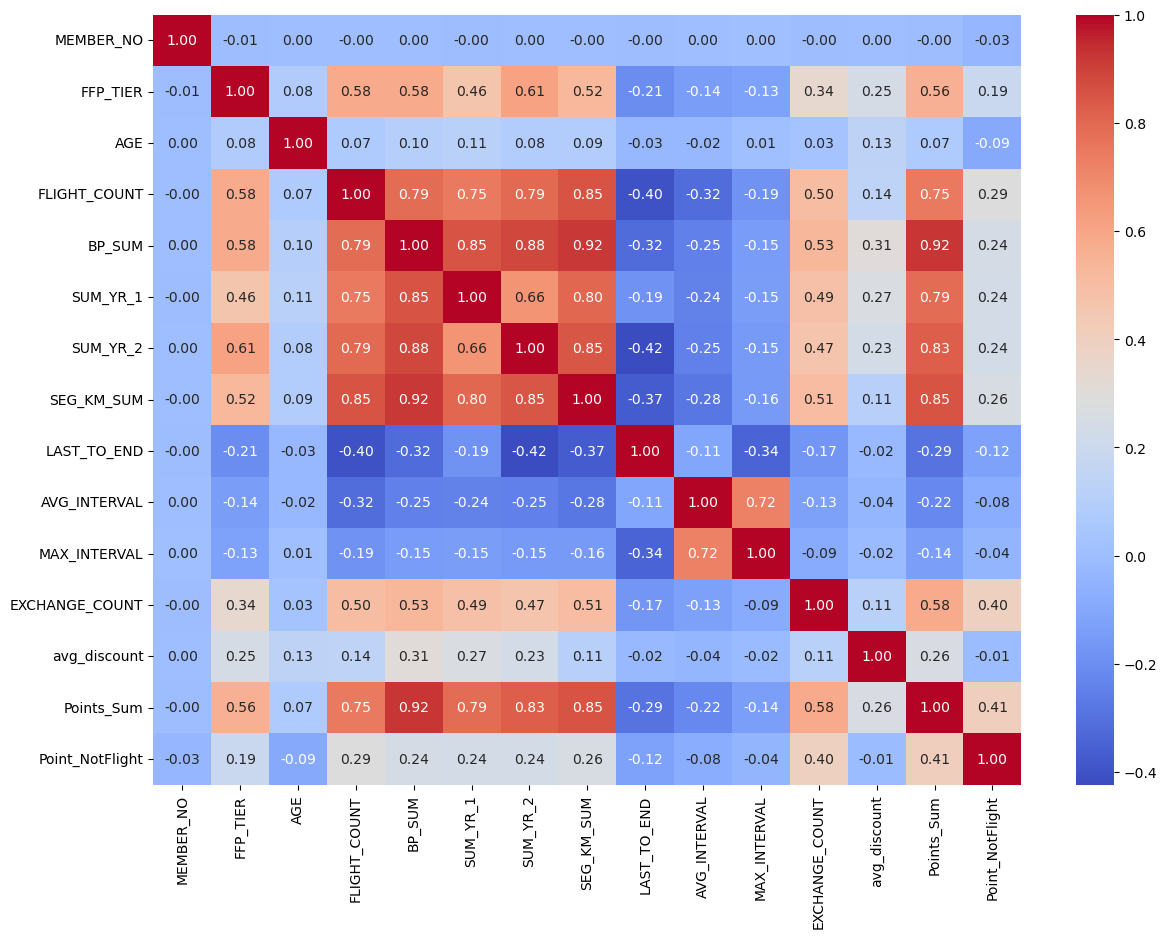

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_flight.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


Potensi kolinearitas ditemukan di antara kolom BP_Sum, Sum_Yr_1, Sum_Yr_2, Seg_Km_Sum, Points_Sum, dan Flight_Count

**Korelasi Tinggi Positif:**

Points_Sum dan BP_SUM: 0.92

SUM_YR_2 dan BP_SUM: 0.89

SUM_YR_2 dan SEG_KM_SUM: 0.85

FLIGHT_COUNT dan SEG_KM_SUM: 0.85

FLIGHT_COUNT dan BP_SUM: 0.79

SUM_YR_1 dan BP_SUM: 0.85

SUM_YR_1 dan FLIGHT_COUNT: 0.75

SUM_YR_2 dan FLIGHT_COUNT: 0.80

SUM_YR_2 dan Points_Sum: 0.83

SEG_KM_SUM dan Points_Sum: 0.85

**Korelasi Tinggi Negatif:**

LAST_TO_END dan FLIGHT_COUNT: -0.41

LAST_TO_END dan SUM_YR_2: -0.42

MAX_INTERVAL dan LAST_TO_END: -0.34

EXCHANGE_COUNT dan LAST_TO_END: -0.17

AVG_INTERVAL dan LAST_TO_END: -0.11

FLIGHT_COUNT dan LAST_TO_END: -0.41

SEG_KM_SUM dan LAST_TO_END: -0.37

MAX_INTERVAL dan EXCHANGE_COUNT: -0.09

AVG_INTERVAL dan MAX_INTERVAL: -0.13

MAX_INTERVAL dan SEG_KM_SUM: -0.16


# 2. Pilih fitur-fitur yang masuk akal secara bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering!

Tujuan dari clustering pada kasus ini adalah memisahkan/mengelompokkan data menjadi beberapa kelompok/ cluster/ segmen customer menjadi beberapa kategori seperti low value, middle value high value menggunakan analisis RFM.<br>

Penerapan RFM analysis akan membantu perusahaan dalam melakukan segmentasi customer secara efektif. RFM sendiri merupakan sebuah singkatan dari recency, frequency, dan monetary value. **Recency (R)** menunjukkan waktu terakhir customer melakukan transaksi. **Frequency (F)** menunjukkan jumlah transaksi yang dilakukan customer. **Monetary (M)** mengukur jumlah uang yang dihabiskan customer dalam melakukan transaksi. Selain itu, pada kasus ini dilakukan penambahan feature loyalty dan discount coefficient. **Loyalty (L)** menunjukkan durasi waktu customer bergabung menggunakan maskapai. **Discount Coefficient (C)** menunjukan koefisien diskon rata-rata yang didapatkan customer.

## Data Preprocessing

###Drop Data yang tidak relevan

In [26]:
df_flight

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0
62986,61027,2013-02-06,2013-02-14,Female,4,guangzhou,guangdong,CN,36.0,2014-03-31,...,0.0,3934,2013-02-26,400,12.000000,12,0,0.000000,0,0


Drop `member_no`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `GENDER`



In [27]:
df_flight = df_flight.drop(["MEMBER_NO", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY", "GENDER"], axis = 1)

In [28]:
df_flight

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,6,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,2007-02-19,2007-08-03,6,42.0,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,2007-02-01,2007-08-30,6,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,2008-08-22,2008-08-23,5,64.0,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,2009-04-10,2009-04-15,6,48.0,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,2011-05-20,2013-06-05,4,25.0,2014-03-31,2,0,0.0,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
62984,2010-03-08,2013-09-14,4,38.0,2014-03-31,4,0,0.0,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
62985,2006-03-30,2006-12-02,4,43.0,2014-03-31,2,0,0.0,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0
62986,2013-02-06,2013-02-14,4,36.0,2014-03-31,2,0,0.0,0.0,3934,2013-02-26,400,12.000000,12,0,0.000000,0,0


In [29]:
df_flight[df_flight['avg_discount']>1]

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
1,2007-02-19,2007-08-03,6,42.0,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,2007-02-01,2007-08-30,6,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,2008-08-22,2008-08-23,5,64.0,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
13,2006-10-25,2007-10-27,6,47.0,2014-03-31,118,241614,105466.0,119832.0,179514,2014-03-29,3,6.196581,38,14,1.398382,270704,20
15,2008-03-28,2008-04-05,4,63.0,2014-03-31,22,286164,69300.0,54764.0,234721,2014-01-27,65,31.190476,102,6,1.026085,310002,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60394,2005-11-22,2006-04-25,4,49.0,2014-03-31,4,2300,3174.0,0.0,1161,2012-10-28,521,62.000000,182,0,1.023945,2300,0
61606,2012-08-09,2012-08-09,4,51.0,2014-03-31,3,1650,2241.0,0.0,822,2012-08-10,600,0.500000,1,0,1.165693,1650,0
61792,2009-03-05,2010-03-04,4,58.0,2014-03-31,2,1250,NaN,0.0,728,2012-07-17,624,3.000000,3,0,1.250000,1250,0
62168,2007-03-01,2007-05-19,4,39.0,2014-03-31,2,869,0.0,1292.0,751,2013-06-05,301,4.000000,4,0,1.089747,869,0


In [30]:
print("Jumlah Data Diskon diatas 100%:", len(df_flight[df_flight['avg_discount']>1]),"Data")

Jumlah Data Diskon diatas 100%: 2947 Data


In [31]:
#Drop Diskon Diatas 100%
df_flight = df_flight[df_flight['avg_discount']<=1]

In [32]:
print("Jumlah Data Diskon diatas 100%:", len(df_flight[df_flight['avg_discount']>1]),"Data")

Jumlah Data Diskon diatas 100%: 0 Data


data telah tertangani

### Handle Missing Value

In [33]:
#menghitung jumlah missing values
count = df_flight.isna().sum().sort_values(ascending = False)
percent = round(df_flight.isna().mean()*100,5).sort_values(ascending = False)

missing_values = pd.concat([count, percent], axis = 1, keys=["Jumlah","Persentase (%)"])
missing_values

,Jumlah,Persentase (%)
SUM_YR_1,542,0.90272
LAST_FLIGHT_DATE,401,0.66788
AGE,389,0.64789
SUM_YR_2,134,0.22318
FFP_DATE,0,0.00000
LAST_TO_END,0,0.00000
Points_Sum,0,0.00000
avg_discount,0,0.00000
EXCHANGE_COUNT,0,0.00000
MAX_INTERVAL,0,0.00000


In [34]:
#menghitung jumlah total missing value

mv_count= df_flight.shape[0] - df_flight.dropna().shape[0]
mv_percent = round((df_flight.shape[0] - df_flight.dropna().shape[0])/df_flight.shape[0]*100,2)
print("Jumlah Missing Value :", mv_count)
print("Jumlah Persentase Missing Value :",mv_percent,"%")

Jumlah Missing Value : 1460
Jumlah Persentase Missing Value : 2.43 %


- Fitur 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LAST_FLIGHT_DATE', 'GENDER' : drop karena secara total persentasenya hanya dibawah 3%
- Selain fitur tersebut tidak memiliki missing value, sehingga tidak perlu dihandle

In [35]:
df_clean = df_flight.dropna()
df_clean.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

### Handle Duplicate

In [36]:
total_rows = len(df_clean)
duplicate_rows = len(df_clean[df_clean.duplicated(keep='first')])
duplicate_percentage = (duplicate_rows / total_rows) * 100
print(f"Jumlah duplikasi data: {duplicate_rows}")
print(f"Persentase duplikasi data: {duplicate_percentage:.2f}%")

Jumlah duplikasi data: 8
Persentase duplikasi data: 0.01%


Terdapat 8 data duplikasi dengan persentase 0.01% kemudian dilakukan drop

In [37]:
df_clean.drop_duplicates(inplace=True)

In [38]:
total_rows = len(df_clean)
duplicate_rows = len(df_clean[df_clean.duplicated(keep='first')])
duplicate_percentage = (duplicate_rows / total_rows) * 100
print(f"Jumlah duplikasi data: {duplicate_rows}")
print(f"Persentase duplikasi data: {duplicate_percentage:.2f}%")

Jumlah duplikasi data: 0
Persentase duplikasi data: 0.00%


In [39]:
df_clean.duplicated().any()

False

Sudah Tidak ada data yang duplikat

### Feature Selection

Fitur yang dipilih untuk digunakan sebagai fitur clustering menggunakan analisis RMF diantaranya :

- LAST_TO_END (Recency) = Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- FLIGHT_COUNT (Frequency) = Jumlah penerbangan customer
- SEG_KM_SUM (Monetary) = Jumlah jarak tempuh
- LOAD_TIME - FFP_DATE (Loyalty) = Jumlah bulan sejak customer bergabung hingga waktu pengambilan dataset
- avg_discount (Disc_Coefficient) = Koefisien diskon rata-rata yang didapat customer

### Create DataFrame Feature Selection

In [40]:
df_new = df_clean.copy

In [41]:
df_new = pd.DataFrame()
df_new['Recency'] = df_clean['LAST_TO_END']
df_new['Frequency'] = df_clean['FLIGHT_COUNT']
df_new['Monetary'] = df_clean['SEG_KM_SUM']
df_new['Loyalty'] = ((df_clean['LOAD_TIME']- df_clean['FFP_DATE']).dt.days/30)
df_new['Disc_Coefficient'] = df_clean['avg_discount']
df_new

,Recency,Frequency,Monetary,Loyalty,Disc_Coefficient
0,1,210,580717,90.200000,0.961639
4,5,152,309928,60.533333,0.970658
5,79,92,294585,74.700000,0.967692
6,1,101,287042,97.700000,0.965347
7,3,73,287230,48.400000,0.962070
...,...,...,...,...,...
62982,437,2,3848,14.500000,0.000000
62983,297,2,1134,34.866667,0.000000
62984,89,4,8016,49.466667,0.000000
62985,29,2,2594,97.433333,0.000000


In [42]:
df_new.columns

Index(['Recency', 'Frequency', 'Monetary', 'Loyalty', 'Disc_Coefficient'], dtype='object')

### Handle Outliers

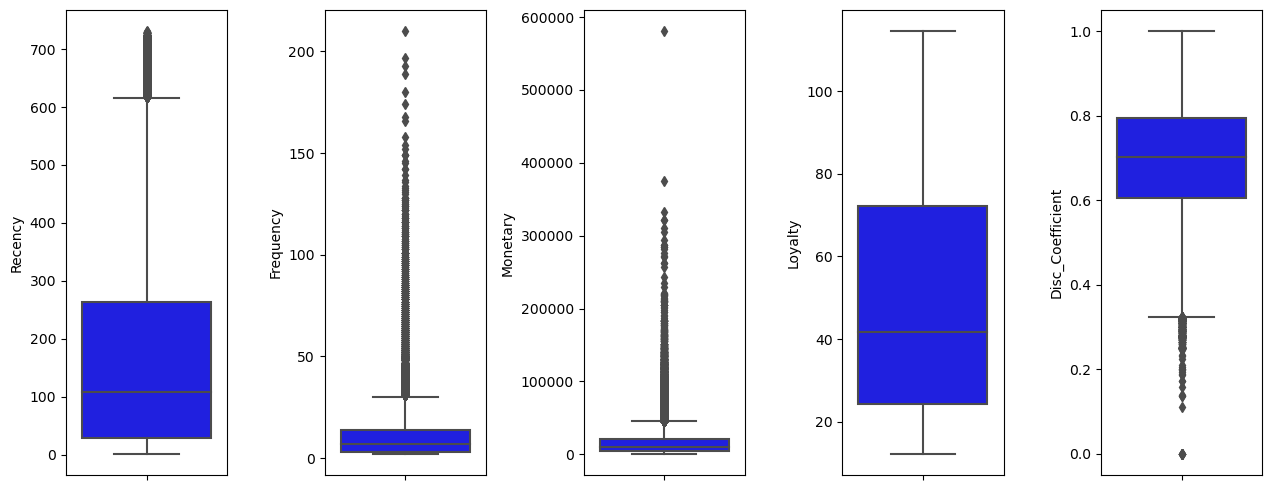

In [43]:
#Boxplot sebelum handle outliers
plt.figure(figsize=(18,5))
feature = df_new.columns
for i in range(0, len(feature)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_new[feature[i]],color='blue', orient='v')
    plt.tight_layout()

In [44]:
#Handle outlier menggunakan metode IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df_new)}')

filtered_entries = np.array([True] * len(df_new))
for col in df_new:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_new[col] >= low_limit) & (df_new[col] <= high_limit)) & filtered_entries

df_new_clean = df_new[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_new_clean)}')

Jumlah baris sebelum memfilter outlier: 58573
Jumlah baris setelah memfilter outlier: 50421


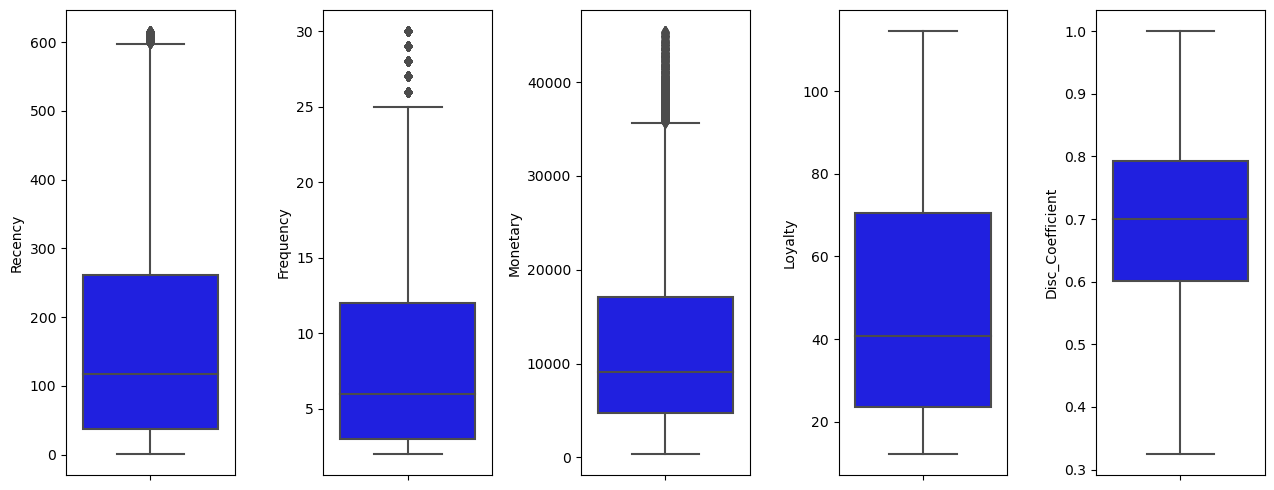

In [45]:
#Boxplot sesudah handle outlier
plt.figure(figsize=(18,5))
feature = df_new_clean.columns
for i in range(0, len(feature)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_new_clean[feature[i]],color='blue', orient='v')
    plt.tight_layout()

### Features Transformation

In [46]:
df_new_clean.describe()

,Recency,Frequency,Monetary,Loyalty,Disc_Coefficient
count,50421.000000,50421.000000,50421.000000,50421.000000,50421.000000
mean,172.165804,8.544119,12152.736915,47.954001,0.694647
std,162.776380,6.630207,9589.159978,27.782700,0.140152
min,1.000000,2.000000,368.000000,12.166667,0.324945
25%,38.000000,3.000000,4702.000000,23.533333,0.600937
50%,118.000000,6.000000,9128.000000,40.666667,0.700000
75%,262.000000,12.000000,17097.000000,70.566667,0.792339
max,616.000000,30.000000,45430.000000,114.566667,1.000000


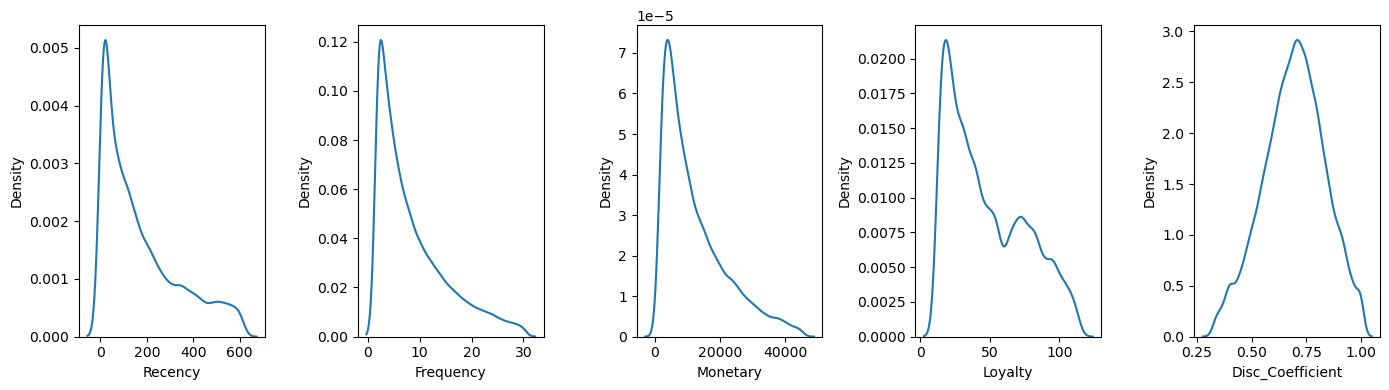

In [47]:
#Distribusi data sebelum distandarisasi

fitur = ['Recency', 'Frequency', 'Monetary', 'Loyalty', 'Disc_Coefficient']

plt.figure(figsize=(14,4))
for i in range(len(fitur)):
    plt.subplot(1,5, i+1)
    sns.kdeplot(x = df_new_clean[fitur[i]])

plt.tight_layout()
plt.show()

In [48]:
#Standarisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_new_clean)
x_std = scaler.transform(df_new_clean)

df_std = pd.DataFrame(x_std, columns = list(df_new_clean))

In [49]:
df_std.head()

,Recency,Frequency,Monetary,Loyalty,Disc_Coefficient
0,-0.308192,3.085286,3.267812,2.329266,2.031150
1,1.110947,-0.232894,3.302748,0.746731,1.925587
2,0.300011,3.085286,3.200339,-1.102160,2.060683
3,-0.971685,0.521238,3.354786,-0.785413,1.643806
4,-0.854959,1.426196,3.305042,-0.664233,1.636071


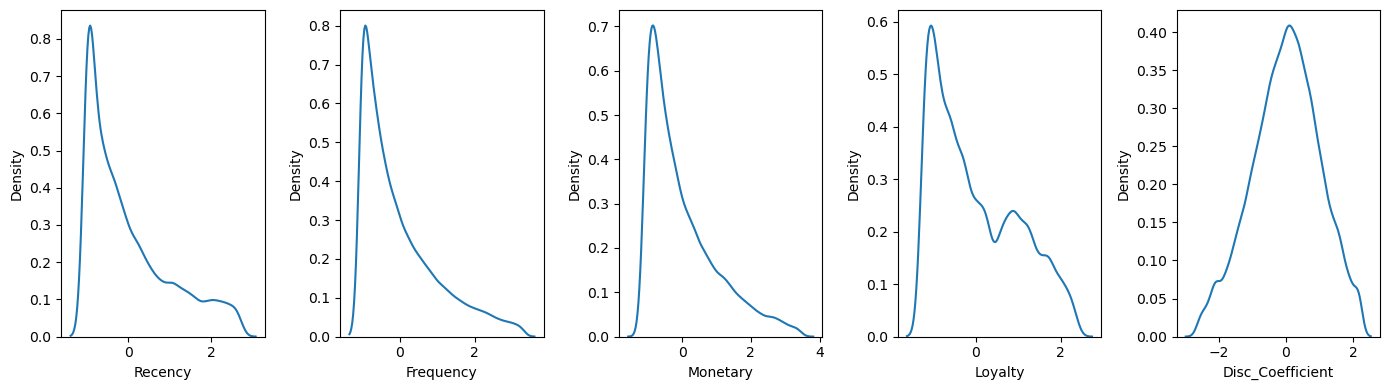

In [50]:
#Distribusi data setelah distandarisasi
plt.figure(figsize=(14,4))
features = df_std.columns
for i in range(0, len(features)):
    plt.subplot(1, 5, i+1)
    sns.kdeplot(x=df_std[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Fitur sudah memiliki rentang nilai yang lebih seragam dan tidak terlalu jauh

<Axes: >

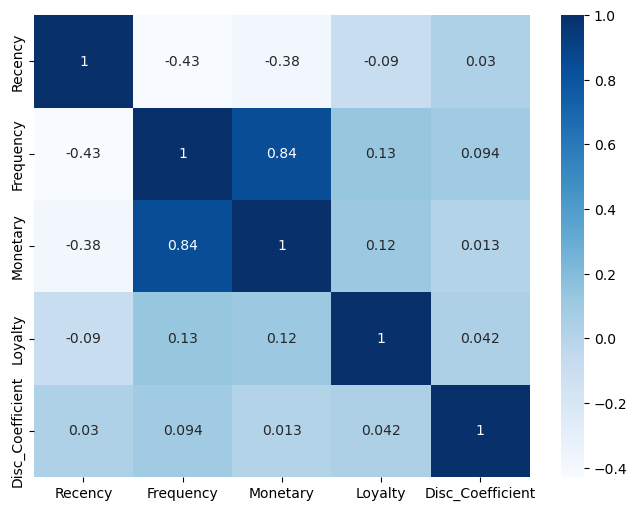

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(df_std.corr(), cmap='Blues', annot=True)

Fitur frekuensi dan monetary memiliki nilai korelasi tertinggi sebesar 0.84, artinya semakin tinggi frekuensi customer menggunakan penerbangan, maka semakin tinggi total jarak yang ditempuh customer saat menggunakan penerbangan.

#Modeling

## Elbow Method

In [52]:
from sklearn.cluster import KMeans

In [53]:
df_std.sample(5)

,Recency,Frequency,Monetary,Loyalty,Disc_Coefficient
28849,-0.983972,-0.534546,-0.639660,-1.130955,1.140928
22299,1.405833,-0.383720,-0.402932,1.236249,1.233158
30318,1.086374,-0.534546,-0.648420,1.699372,0.780205
42732,0.908213,-0.987026,-0.933849,-0.304293,0.071550
44564,2.081614,-0.836199,-0.992666,-0.693028,0.267230


In [54]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)
    inertia_values = kmeans.inertia_
    print(f"cluster : {i} inertia value = {inertia_values}")

cluster : 1 inertia value = 252105.00000000023
cluster : 2 inertia value = 176286.70328282245
cluster : 3 inertia value = 145555.56411080455
cluster : 4 inertia value = 122791.7731894749
cluster : 5 inertia value = 107161.46119596197
cluster : 6 inertia value = 97653.66450824474
cluster : 7 inertia value = 90105.44847950374
cluster : 8 inertia value = 83806.71532992953
cluster : 9 inertia value = 78223.31607455139
cluster : 10 inertia value = 73924.75251662113


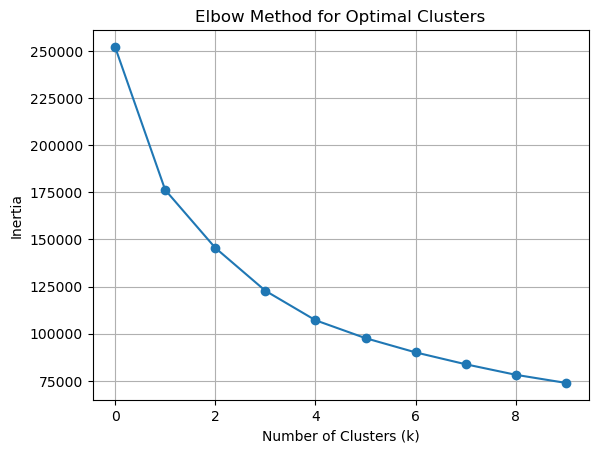

In [55]:
plt.plot(inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

Berdasarkan hasil analisis dengan menggunakan Elbow Method, dapat dilihat pada titik di mana garis mulai  membentuk seperti siku. Dari hasil diatas, jumlah cluster optimal yang paling sesuai untuk data kita di antara 2, 3, atau 4  karena  kurva yang dihasilkan menunjukkan sumbu (y) inertia semakin rendah pada number of clusters berada di posisi k tersebut. Maka dari itu, kami disini menggungakan yellowbrick untuk melihat point yang paling optimal.

In [56]:
#install library yellowbrick
!pip install yellowbrick

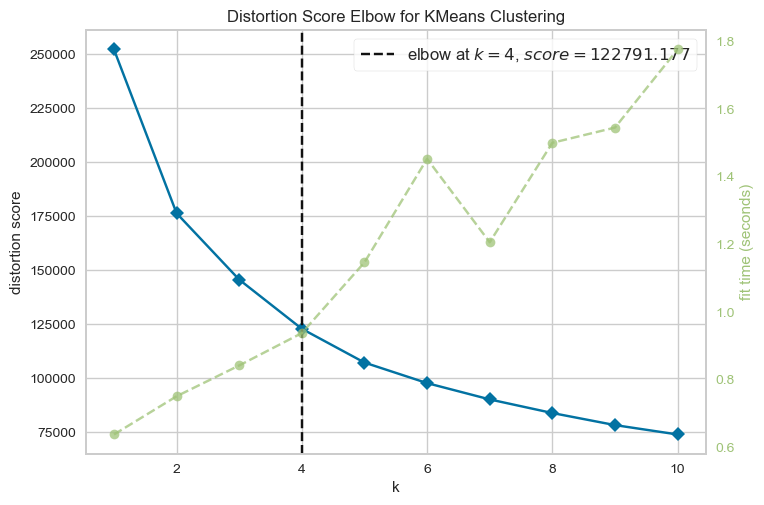

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std.values)
visualizer.show()

dapat disimpulkan titik paling optimal berada pada k=4

## Evaluasi dan Visualisasi Menggunakan PCA

### Simulasi menggunakan 2 Cluster

In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x_std)
df_std['Clusters'] = kmeans.labels_

In [60]:
df_std.sample(5)

,Recency,Frequency,Monetary,Loyalty,Disc_Coefficient,Clusters
36427,0.816061,-0.836199,-0.708697,-1.241336,-0.418273,1
16441,-0.842672,0.370412,0.492880,-0.952185,-0.847981,0
4403,-0.492495,0.822891,1.693728,0.023252,-0.010149,0
24626,0.029699,-0.685373,-0.342133,1.521801,0.180898,1
19908,-0.443348,0.521238,-0.367475,-1.144153,1.744468,1


In [61]:
df_std.groupby('Clusters').agg(['mean','median','std'])

Recency                     Frequency                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0        -0.634164 -0.805812  0.468486  1.220209  1.124543  0.854042   
1         0.280929  0.029699  1.043420 -0.540542 -0.685373  0.410054   

          Monetary                       Loyalty                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0         1.198525  1.045698  0.854329  0.238612  0.078443  1.027615   
1        -0.530936 -0.626467  0.448837 -0.105703 -0.378681  0.968947   

         Disc_Coefficient                      
                     mean    median       std  
Clusters                                       
0                0.099874  0.103232  0.787831  
1               -0.044243 -0.000102  1.077827

In [62]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

In [63]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['Clusters'] = df_std['Clusters']
data_pca.head()

,PC 1,PC 2,Clusters
0,4.614350,2.567200,0
1,1.759272,2.008718,0
2,3.777404,1.188954,0
3,2.869824,0.674957,0
4,3.361602,0.759379,0


In [64]:
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_2'] = df_std['Clusters']
data_pca.head()

,PC 1,PC 2,clusters_2
0,4.614350,2.567200,0
1,1.759272,2.008718,0
2,3.777404,1.188954,0
3,2.869824,0.674957,0
4,3.361602,0.759379,0


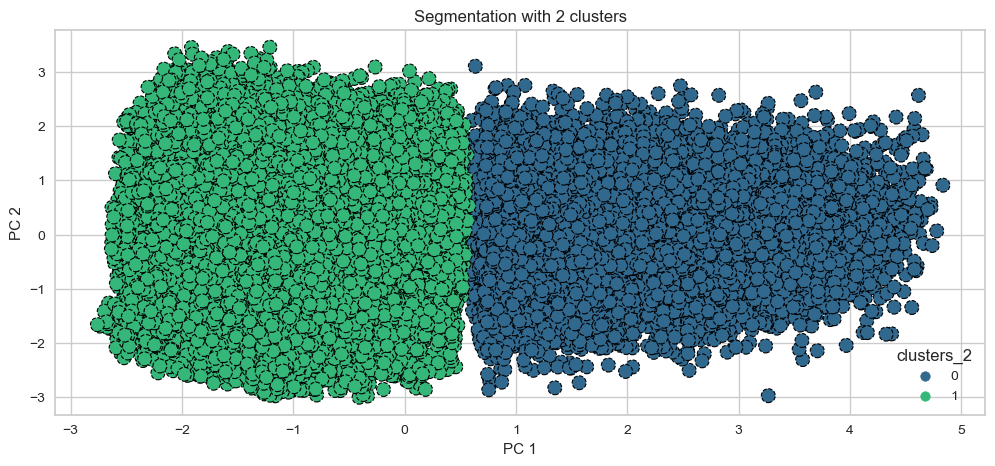

In [65]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_2", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s = 100)
plt.title("Segmentation with 2 clusters")
plt.show()

### Simulasi menggunakan 4 Cluster

In [66]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x_std)
df_std['Clusters'] = kmeans.labels_

In [68]:
df_std.sample(5)

,Recency,Frequency,Monetary,Loyalty,Disc_Coefficient,Clusters
22667,0.453597,-0.383720,-0.287696,-0.321090,0.405663,1
12778,1.012652,0.068759,0.773513,-0.480664,-0.639429,1
18081,1.534846,-0.082067,0.270857,-1.049368,-0.640010,2
7899,-0.240613,1.878675,0.962269,-0.209509,0.241360,0
38681,0.127994,-0.685373,-0.632568,0.194823,-1.480073,1


In [69]:
df_std.groupby('Clusters').agg(['mean','median','std'])

Recency                     Frequency                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0        -0.649558 -0.824242  0.468761  1.559038  1.426196  0.784046   
1        -0.382139 -0.461778  0.502540 -0.332588 -0.383720  0.514354   
2         1.603342  1.577850  0.627210 -0.704435 -0.836199  0.362941   
3        -0.261988 -0.388056  0.638346 -0.300147 -0.383720  0.551851   

          Monetary                       Loyalty                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0         1.523040  1.408976  0.794321  0.177048  0.018453  0.973444   
1        -0.332097 -0.429733  0.545798 -0.690403 -0.766216  0.441818   
2        -0.666218 -0.798695  0.452004 -0.322744 -0.552652  0.795276   
3        -0.302115 -0.395423  0.567716  1.212005  1.167861  0.554455   

         Disc_Coefficient                      
                     mean    median       std  
Clusters                                       
0                0.138615  0.127752  0.759283  
1               -0.188230 -0.140185  0.998335  
2                0.140353  0.216574  1.160983  
3                0.035556  0.072779  0.995945

In [70]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

In [71]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_4'] = df_std['Clusters']
data_pca.head()

,PC 1,PC 2,clusters_4
0,4.287430,2.798513,0
1,2.010172,0.615713,0
2,4.148822,-0.129762,0
3,3.270792,-0.182384,0
4,3.694179,0.058343,0


In [72]:
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)



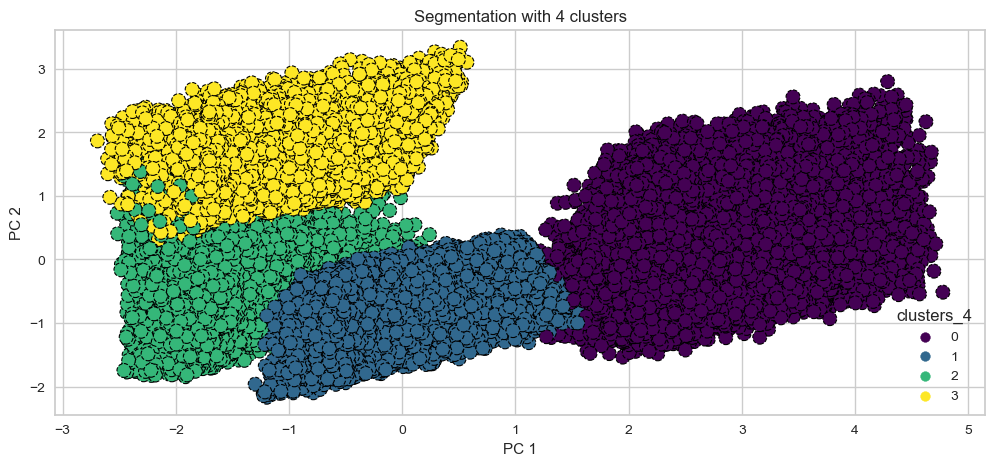

In [73]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_4", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s = 100)
plt.title("Segmentation with 4 clusters")
plt.show()

### Simulasi menggunakan 5 Cluster

In [74]:
from sklearn.cluster import KMeans

In [75]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x_std)
df_std['Clusters'] = kmeans.labels_

In [76]:
df_std.sample(5)

,Recency,Frequency,Monetary,Loyalty,Disc_Coefficient,Clusters
10828,0.963504,1.124543,0.970091,-0.039137,-0.578547,0
25161,0.164855,-0.383720,-0.314080,-0.385879,-0.105321,2
23356,-1.039263,-0.082067,-0.204476,0.881109,-0.181273,4
19124,-0.173035,0.219585,-0.214905,-0.600644,1.006343,2
24387,0.152568,-0.232894,-0.226689,1.725767,-0.330941,4


In [77]:
df_std_5=df_std.groupby('Clusters').agg(['mean','median','std'])
df_std_5

Recency                     Frequency                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0        -0.658814 -0.836529  0.462617  1.606507  1.577022  0.780235   
1         0.123964 -0.031736  0.864950 -0.582095 -0.685373  0.417538   
2        -0.414693 -0.523213  0.496991 -0.205439 -0.232894  0.562059   
3         1.712639  1.725293  0.601228 -0.696216 -0.836199  0.368166   
4        -0.292419 -0.418774  0.629590 -0.247393 -0.383720  0.573693   

          Monetary                       Loyalty                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0         1.581749  1.470661  0.777147  0.186118  0.037650  0.973646   
1        -0.511681 -0.651965  0.499201 -0.484973 -0.645036  0.671733   
2        -0.255411 -0.329880  0.568584 -0.655383 -0.738620  0.463752   
3        -0.665227 -0.800103  0.459803 -0.231467 -0.468666  0.844557   
4        -0.248015 -0.335042  0.590286  1.295244  1.250647  0.526074   

         Disc_Coefficient                      
                     mean    median       std  
Clusters                                       
0                0.089898  0.079459  0.744372  
1               -1.319599 -1.255271  0.589755  
2                0.489787  0.411460  0.667253  
3                0.506508  0.451548  0.906819  
4                0.091747  0.074220  0.875449

In [78]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

In [79]:
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_5'] = df_std['Clusters']
data_pca.head()

,PC 1,PC 2,clusters_5
0,3.966373,3.545074,0
1,2.206560,0.974683,0
2,4.078806,1.213543,0
3,3.353632,0.771848,0
4,3.700279,1.111677,0


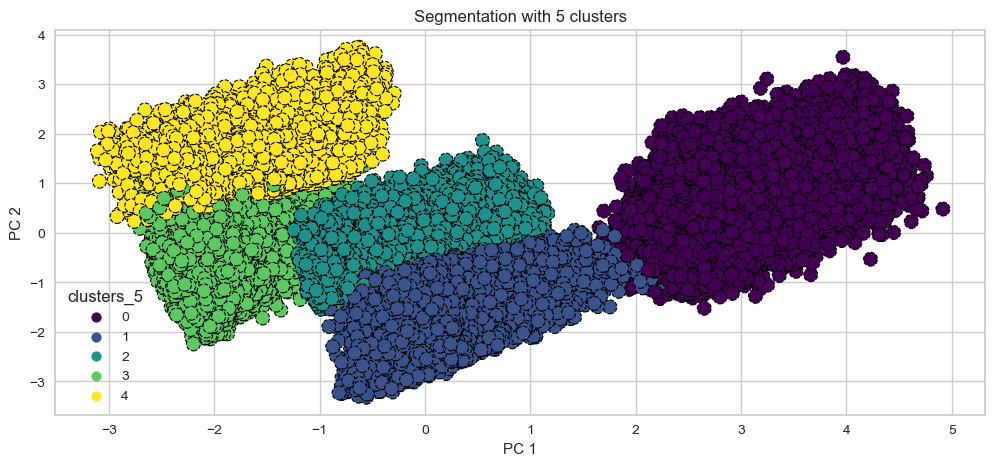

In [80]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_5", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s = 100)
plt.title("Segmentation with 5 clusters")
plt.show()

### Simulasi menggunakan 6 Cluster

In [81]:
from sklearn.cluster import KMeans

In [82]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x_std)
df_std['Clusters'] = kmeans.labels_

In [83]:
df_std.sample(5)

,Recency,Frequency,Monetary,Loyalty,Disc_Coefficient,Clusters
12267,-0.455635,0.822891,0.489231,0.885908,0.191615,4
44260,0.293867,-0.987026,-1.053256,-0.095528,1.919337,1
26167,0.152568,-0.685373,-0.475827,-0.726622,0.595970,1
42566,1.891167,-0.987026,-0.833422,-0.563450,-1.037312,2
35709,0.459741,-0.987026,-0.674595,-0.712225,-0.496944,3


In [84]:
df_std.groupby('Clusters').agg(['mean','median','std'])

Recency                     Frequency                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0        -0.557055 -0.725947  0.506753  0.667210  0.672064  0.580957   
1        -0.304097 -0.369626  0.529103 -0.491765 -0.534546  0.402676   
2         1.788095  1.811302  0.550772 -0.690528 -0.836199  0.372971   
3         0.172551  0.029699  0.872069 -0.639027 -0.685373  0.343683   
4        -0.292775 -0.418774  0.629290 -0.241978 -0.383720  0.568371   
5        -0.694139 -0.854959  0.432876  1.937491  1.878675  0.705281   

          Monetary                       Loyalty                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0         0.716621  0.629912  0.606124 -0.544382 -0.641437  0.525865   
1        -0.560843 -0.615465  0.380644 -0.606582 -0.700227  0.518129   
2        -0.652720 -0.788058  0.464508 -0.197647 -0.441070  0.862856   
3        -0.583131 -0.677046  0.407529 -0.495896 -0.660634  0.672496   
4        -0.241387 -0.324300  0.583806  1.320223  1.275843  0.512861   
5         1.856829  1.797335  0.747562  0.561040  0.650747  0.974872   

         Disc_Coefficient                      
                     mean    median       std  
Clusters                                       
0               -0.035038 -0.038960  0.722375  
1                0.682794  0.623148  0.649735  
2                0.478375  0.400283  0.908628  
3               -1.325633 -1.270775  0.600611  
4                0.052298  0.041259  0.870583  
5                0.165750  0.147153  0.736168

In [85]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

In [86]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['Clusters'] = df_std['Clusters']
data_pca.head()

,PC 1,PC 2,Clusters
0,4.576449,2.749151,5
1,2.951316,0.473629,5
2,3.265083,2.970606,5
3,2.934220,2.058828,5
4,3.191504,2.473385,5


In [87]:
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_6'] = df_std['Clusters']
data_pca.head()

,PC 1,PC 2,clusters_6
0,4.576449,2.749151,5
1,2.951316,0.473629,5
2,3.265083,2.970606,5
3,2.934220,2.058828,5
4,3.191504,2.473385,5


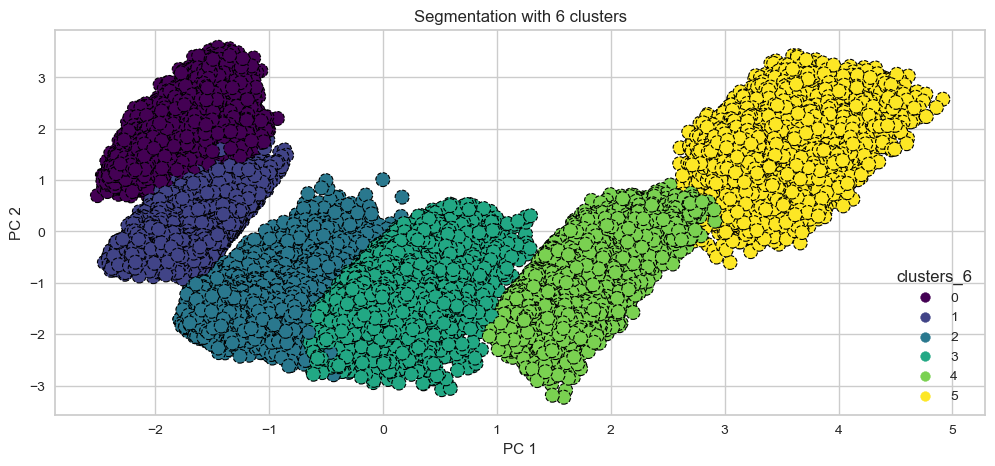

In [88]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_6", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s = 100)
plt.title("Segmentation with 6 clusters")
plt.show()

# **Interpretasi cluster yang dihasilkan secara bisnis & Insight**

In [89]:
# Menempelkan Cluster & Statistik fitur dari setiap cluster
df_std_5

Recency                     Frequency                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0        -0.658814 -0.836529  0.462617  1.606507  1.577022  0.780235   
1         0.123964 -0.031736  0.864950 -0.582095 -0.685373  0.417538   
2        -0.414693 -0.523213  0.496991 -0.205439 -0.232894  0.562059   
3         1.712639  1.725293  0.601228 -0.696216 -0.836199  0.368166   
4        -0.292419 -0.418774  0.629590 -0.247393 -0.383720  0.573693   

          Monetary                       Loyalty                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0         1.581749  1.470661  0.777147  0.186118  0.037650  0.973646   
1        -0.511681 -0.651965  0.499201 -0.484973 -0.645036  0.671733   
2        -0.255411 -0.329880  0.568584 -0.655383 -0.738620  0.463752   
3        -0.665227 -0.800103  0.459803 -0.231467 -0.468666  0.844557   
4        -0.248015 -0.335042  0.590286  1.295244  1.250647  0.526074   

         Disc_Coefficient                      
                     mean    median       std  
Clusters                                       
0                0.089898  0.079459  0.744372  
1               -1.319599 -1.255271  0.589755  
2                0.489787  0.411460  0.667253  
3                0.506508  0.451548  0.906819  
4                0.091747  0.074220  0.875449

In [90]:
df_std.columns

Index(['Recency', 'Frequency', 'Monetary', 'Loyalty', 'Disc_Coefficient',
       'Clusters'],
      dtype='object')

## **Deskripsi Customer & Rekomendasi Bisnis :**


### **Cluster 0:**
**Pelanggan Loyal dengan Pembelian Tinggi**

Recency: Rata-rata pelanggan bertransaksi sekitar 0.66 standar deviasi di bawah mean, variabilitas rendah.<br>

Frequency: Rata-rata pelanggan bertransaksi sekitar 1.61 standar deviasi di atas mean, menunjukkan keberlanjutan dalam pembelian.<br>

Monetary: Rata-rata pelanggan bertransaksi sekitar 1.58 standar deviasi di atas mean, pelanggan dengan nilai transaksi tinggi.<br>

Loyalty: Skor kesetiaan rata-rata sekitar 0.19 standar deviasi di atas mean, menunjukkan tingkat kesetiaan yang baik.<br>

Discount Coefficient: Rata-rata pelanggan memiliki koefisien diskon sekitar 0.09 standar deviasi di atas mean, menunjukkan preferensi terhadap diskon moderat.<br>

---



***Rekomendasi***: Tingkatkan insentif untuk pembelian lebih lanjut, pertahankan program loyalitas dan penawaran ekslusif.

### **Cluster 1:** <br>
**Pelanggan Tidak Aktif dengan Nilai Transaksi Rendah**

Recency: Rata-rata pelanggan bertransaksi sekitar 0.12 standar deviasi di atas mean, variasi tinggi.<br>

Frequency: Rata-rata pelanggan bertransaksi sekitar 0.58 standar deviasi di bawah mean, menunjukkan pembelian tidak teratur.<br>

Monetary: Rata-rata pelanggan bertransaksi sekitar 0.67 standar deviasi di bawah mean, nilai transaksi rendah.<br>

Loyalty: Skor kesetiaan rata-rata sekitar 0.48 standar deviasi di bawah mean, tingkat kesetiaan rendah.<br>

Discount Coefficient: Rata-rata pelanggan memiliki koefisien diskon sekitar 0.67 standar deviasi di bawah mean, menunjukkan ketidakminatan terhadap diskon besar.<br>

---



***Rekomendasi***: Aktifkan strategi pemasaran untuk meningkatkan frekuensi pembelian, pertimbangkan penawaran spesial untuk meningkatkan kesetiaan.

### **Cluster 2:** <br>
**Pelanggan Jarang Aktif dengan Nilai Transaksi Rendah**

Recency: Rata-rata pelanggan bertransaksi sekitar 0.41 standar deviasi di bawah mean, variasi rendah.<br>

Frequency: Rata-rata pelanggan bertransaksi sekitar 0.21 standar deviasi di bawah mean, menunjukkan pembelian tidak teratur.<br>

Monetary: Rata-rata pelanggan bertransaksi sekitar 0.26 standar deviasi di bawah mean, nilai transaksi rendah.<br>

Loyalty: Skor kesetiaan rata-rata sekitar 0.66 standar deviasi di bawah mean, tingkat kesetiaan rendah.<br>

Discount Coefficient: Rata-rata pelanggan memiliki koefisien diskon sekitar 0.49 standar deviasi di bawah mean, menunjukkan ketidakminatan terhadap diskon besar.<br>

---

***Rekomendasi***: Fokus pada strategi retensi pelanggan, pertimbangkan peningkatan penghargaan loyalitas.

### **Cluster 3:** <br>
**Pelanggan Aktif dengan Kesetiaan Tinggi**

Recency: Rata-rata pelanggan bertransaksi sekitar 1.71 standar deviasi di atas mean, variasi tinggi.<br>

Frequency: Rata-rata pelanggan bertransaksi sekitar 0.70 standar deviasi di bawah mean, menunjukkan aktivitas belanja yang moderat.<br>

Monetary: Rata-rata pelanggan bertransaksi sekitar 0.51 standar deviasi di bawah mean, nilai transaksi sedang.<br>

Loyalty: Skor kesetiaan rata-rata sekitar 0.91 standar deviasi di atas mean, menunjukkan kesetiaan yang tinggi.<br>

Discount Coefficient: Rata-rata pelanggan memiliki koefisien diskon sekitar 0.45 standar deviasi di atas mean, menunjukkan preferensi terhadap diskon moderat.<br>

---

***Rekomendasi***: Tingkatkan komunikasi untuk mempertahankan kesetiaan, pertimbangkan penawaran eksklusif.

### **Cluster 4:** <br>
**Pelanggan Jarang Aktif dengan Nilai Transaksi Rendah**

Recency: Rata-rata pelanggan bertransaksi sekitar 0.29 standar deviasi di bawah mean, variasi rendah.<br>

Frequency: Rata-rata pelanggan bertransaksi sekitar 0.25 standar deviasi di bawah mean, menunjukkan pembelian tidak teratur.<br>

Monetary: Rata-rata pelanggan bertransaksi sekitar 0.09 standar deviasi di atas mean, nilai transaksi rendah.<br>

Loyalty: Skor kesetiaan rata-rata sekitar 0.88 standar deviasi di atas mean, tingkat kesetiaan tinggi.<br>

Discount Coefficient: Rata-rata pelanggan memiliki koefisien diskon sekitar 0.07 standar deviasi di atas mean, menunjukkan ketidakminatan terhadap diskon besar.<br>


---


***Rekomendasi***: Fokus pada strategi reaktivasi dan retensi pelanggan, adakan program discount dan sebagainya untuk menarik kembal customer.
.

## Melihat jumlah Customer masing-masing Cluster

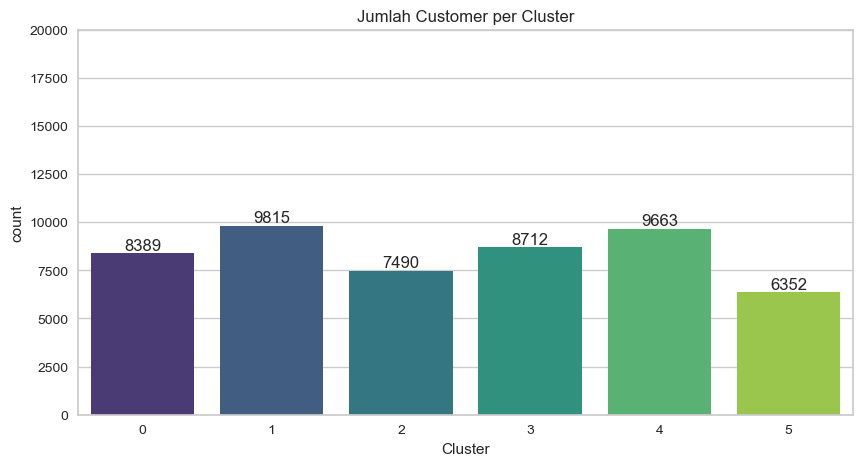

In [91]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data= df_std, x = "Clusters", palette="viridis")
ax.bar_label(ax.containers[0])
plt.ylim(0,20000)
plt.title("Jumlah Customer per Cluster")
plt.xlabel("Cluster")
plt.show()

- Dari visualisasi di atas, menunjukan bahwa Cluster 2 dengan pelanggan jarang aktif  dengan nilai transaksi rendah, memiliki jumlah customer terbanyak dibandingkan Cluster lainnya yaitu sebanyak 12.976 customer. Sedangkan Cluster 3 dengan pelanggan yang aktif dan tingkat loyal yang tinggi,  memiliki jumlah customer terendah dibanding Cluster lainnya, yaitu sebanyak 8054 customer.<br>

- Dari data tersebut perlu menjadi perhatian bagi perusahaan, berdasarkan data pesebaran jumlah customer yang jarang aktif dengan nilai transaksi rendah adalah yang terbanyak, sehingga perlu dibuat strategi khusus untuk mengurangi/memperkecil jumlah data customer tersebut dengan startegi marketing yang pas seperti program diskon, bundling, member, agar customer cluster 2 ini bisa berpindah ke cluster 3 yang dimana jumlah data customernya paling sedikit dibanding cluster lainnya padahal paling menguntungkan bagi perusahaan.<br>

- Untuk customer di Cluster 3 perlu diperhatikan juga dan dijaga agar jumlah customer tidak berkurang, bahkan seharusnya bertambah. Hal ini bisa dilakukan strategi marketing program seperti membership prioritas dengan berbagai macam keuntungan yang ditawarkan<br>
